# 서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] ='Malgun Gothic'
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## EDA

### RAW DATA 파악하기

In [3]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


In [4]:
train.head() #시계열 아님.

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


### 시각화

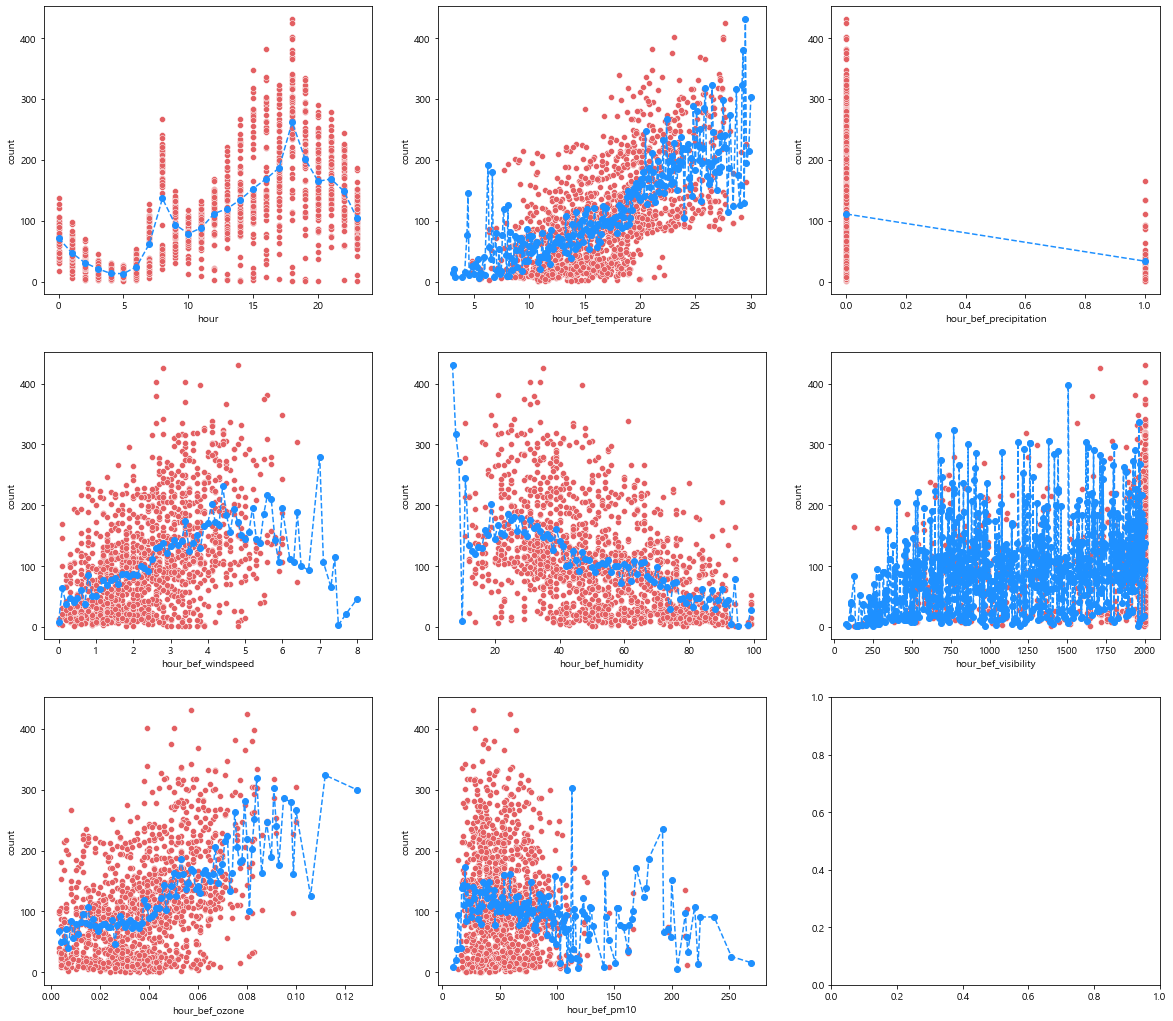

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(20,18))
cl = train.columns
row=0
col=0
for i in cl[1:-2]:
    sns.scatterplot(data=train, x=i, y='count', ax=axes[row, col], color='#e35f62')
    train.groupby([i])['count'].mean().plot(ax=axes[row, col], color='dodgerblue', marker='o', linestyle='--') #평균 count
    col+=1
    if col==3:
        col=0
        row+=1

Text(16, 150, '6PM')

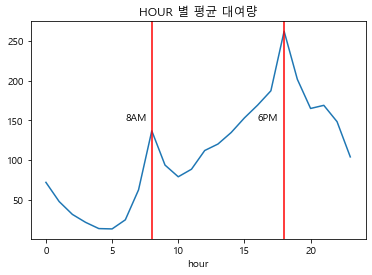

In [7]:
train.groupby(['hour'])['count'].mean().plot()
plt.title('HOUR 별 평균 대여량')
plt.axvline(x=8,color='r')
plt.axvline(x=18,color='r')
plt.text(6, 150, '8AM')
plt.text(16, 150, '6PM')

<AxesSubplot:xlabel='hour_bef_precipitation', ylabel='count'>

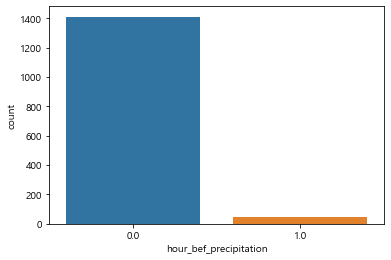

In [8]:
sns.countplot(data = train, x = 'hour_bef_precipitation')

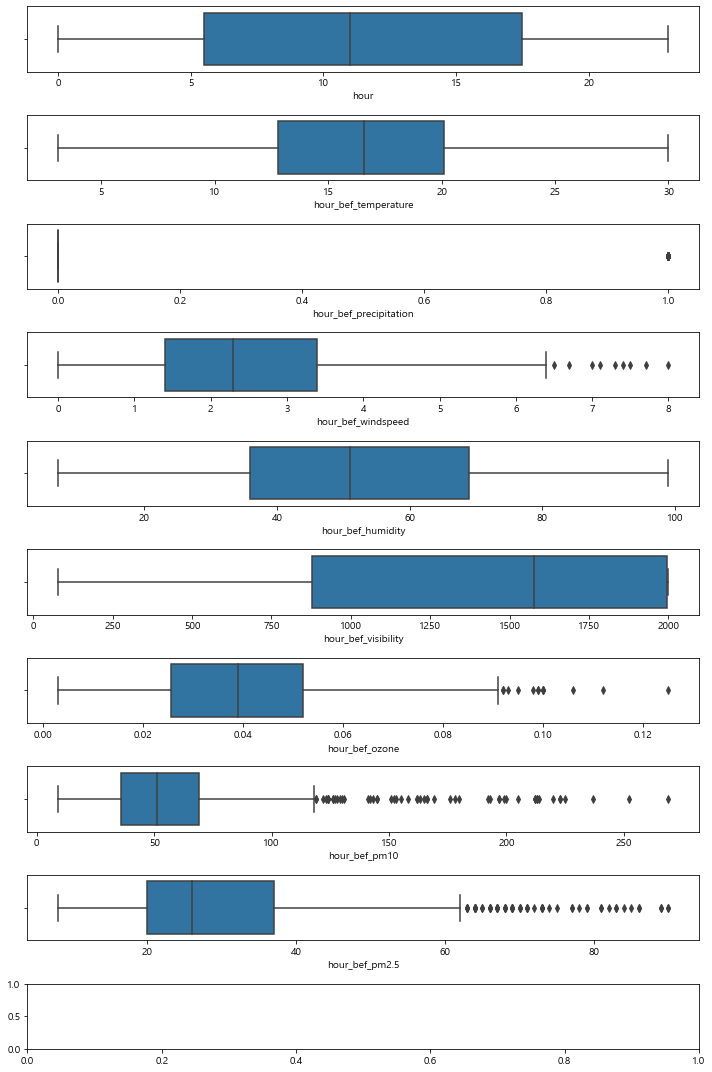

In [9]:
fig, axes = plt.subplots(10,1, figsize = (10, 15))
row=0
for i in cl[1:-1]:
    sns.boxplot(data = train, x = i, ax = axes[row])
    row+=1
plt.tight_layout()
plt.show()

c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


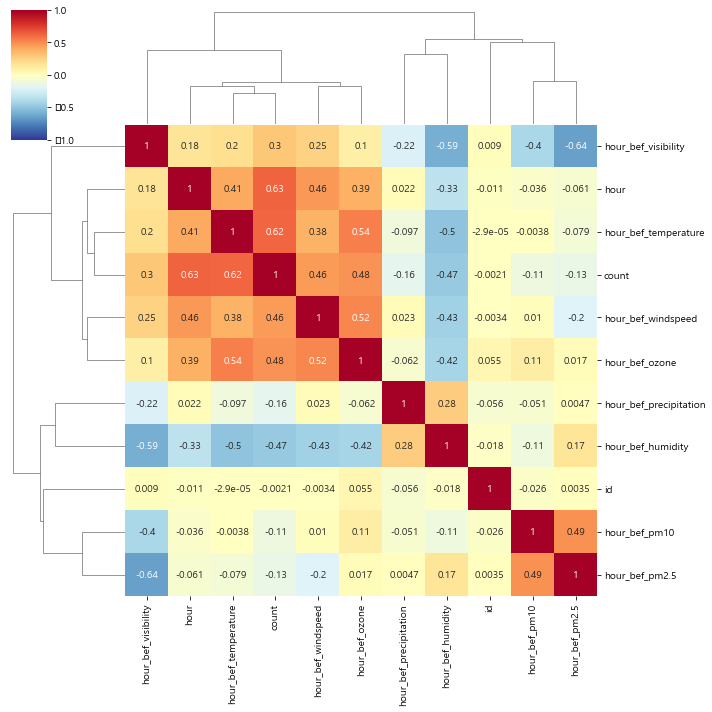

In [10]:
sns.clustermap(train.corr(), 
               annot = True,      # 실제 값 표시
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위 표시
              )

## 데이터 전처리

### 결측치 확인

In [11]:
train.isnull().sum() 

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [12]:
train.isnull().mean() #결측값 비중: 일반적으로 5% 초과하는 변수는 삭제하는 편이 좋다고 여겨짐

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001371
hour_bef_precipitation    0.001371
hour_bef_windspeed        0.006169
hour_bef_humidity         0.001371
hour_bef_visibility       0.001371
hour_bef_ozone            0.052090
hour_bef_pm10             0.061686
hour_bef_pm2.5            0.080192
count                     0.000000
dtype: float64

In [19]:
test.isnull().mean()

id                        0.000000
hour                      0.000000
hour_bef_temperature      0.001399
hour_bef_precipitation    0.001399
hour_bef_windspeed        0.001399
hour_bef_humidity         0.001399
hour_bef_visibility       0.001399
hour_bef_ozone            0.048951
hour_bef_pm10             0.051748
hour_bef_pm2.5            0.050350
dtype: float64

In [21]:
train[train.isna().any(axis=1)] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
14,28,1,20.0,0.0,1.8,58.0,2000.0,NaN,NaN,NaN,74.0
18,33,13,22.6,0.0,NaN,41.0,987.0,0.046,64.0,39.0,208.0
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0
44,76,17,21.7,0.0,3.0,35.0,2000.0,NaN,32.0,19.0,213.0
46,78,1,12.2,0.0,3.0,49.0,1071.0,NaN,NaN,NaN,36.0
...,...,...,...,...,...,...,...,...,...,...,...
1361,2047,1,12.6,0.0,2.4,48.0,1805.0,NaN,NaN,NaN,43.0
1378,2066,11,10.1,0.0,1.5,59.0,990.0,0.015,39.0,NaN,78.0
1391,2086,1,11.5,0.0,3.2,23.0,2000.0,NaN,NaN,NaN,42.0
1398,2096,20,14.0,0.0,2.9,35.0,910.0,0.061,NaN,NaN,117.0


In [22]:
test[test.isna().any(axis=1)] 

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
18,42,18,29.4,0.0,3.3,43.0,1685.0,0.055,NaN,NaN
32,82,1,22.8,0.0,2.4,52.0,2000.0,NaN,NaN,NaN
40,115,1,21.5,1.0,0.5,90.0,347.0,NaN,NaN,NaN
47,147,1,22.8,0.0,1.2,57.0,1190.0,NaN,NaN,NaN
86,260,1,20.0,0.0,2.0,65.0,1662.0,NaN,NaN,NaN
92,270,1,20.0,0.0,1.7,31.0,2000.0,NaN,NaN,NaN
102,297,1,15.1,1.0,2.2,98.0,224.0,NaN,NaN,NaN
114,323,1,18.7,0.0,1.4,41.0,2000.0,NaN,NaN,NaN
126,352,1,19.2,0.0,1.4,80.0,1085.0,NaN,NaN,NaN
128,356,15,25.5,0.0,3.6,40.0,1404.0,0.077,NaN,NaN


### 결측값 처리 - KNN

In [27]:
from sklearn.experimental import enable_iterative_imputer
from fancyimpute import KNN
knnOutput = KNN(k=5).complete(train)

ImportError: cannot import name '_is_arraylike_not_scalar' from 'sklearn.utils.validation' (c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py)

### 결측치 처리 - 5% 초과 변수 삭제, 풍속 변수 예측으로 결측치 fill -> 별로,,,

In [23]:
train1 = train.drop(['hour_bef_pm2.5'], axis=1)
train1.isnull().sum()

id                         0
hour                       0
hour_bef_temperature       2
hour_bef_precipitation     2
hour_bef_windspeed         9
hour_bef_humidity          2
hour_bef_visibility        2
hour_bef_ozone            76
hour_bef_pm10             90
count                      0
dtype: int64

In [20]:
train1[train1.isna().any(axis=1)] #hour 하나 가지고 어떻게 하라고

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
18,33,13,22.6,0.0,NaN,41.0,987.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,20.0


In [14]:
hasnull = train1[train1['hour_bef_windspeed'].isnull()]
hasnull

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count
18,33,13,22.6,0.0,NaN,41.0,987.0,208.0
244,381,1,14.1,0.0,NaN,55.0,1992.0,38.0
260,404,3,14.0,0.0,NaN,50.0,2000.0,17.0
376,570,0,14.3,0.0,NaN,49.0,2000.0,58.0
780,1196,20,16.5,0.0,NaN,31.0,2000.0,181.0
934,1420,0,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.4,0.0,NaN,44.0,1375.0,116.0
1229,1855,2,14.0,0.0,NaN,52.0,2000.0,20.0


In [15]:
perfect = train1[train1['hour_bef_windspeed'].isnull()==False]
perfect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1450 non-null   int64  
 1   hour                    1450 non-null   int64  
 2   hour_bef_temperature    1450 non-null   float64
 3   hour_bef_precipitation  1450 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1450 non-null   float64
 6   hour_bef_visibility     1450 non-null   float64
 7   count                   1450 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 102.0 KB


In [16]:
X = perfect.drop('id', axis=1)
wind = X.pop('hour_bef_windspeed')
non_wind = X

In [17]:
# make simple regressor to fill wind_na
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([('scaler',StandardScaler()), ('model', RandomForestRegressor())])
pipeline.fit(non_wind, wind)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [18]:
wind_x = hasnull.drop(['id', 'hour_bef_windspeed'], axis=1)
pred_wind = pipeline.predict(wind_x)
pred_wind

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
hasnull['hour_bef_windspeed'] = pred_wind
hasnull

<ipython-input-249-e9423892e559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hasnull['hour_bef_windspeed'] = pred_wind


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count,relative_temp
18,33,13,22.6,0.0,3.133,41.0,987.0,208.0,-1.951667
244,381,1,14.1,0.0,1.564,55.0,1992.0,38.0,0.055738
260,404,3,14.0,0.0,0.911,50.0,2000.0,17.0,-0.642623
376,570,0,14.3,0.0,2.535,49.0,2000.0,58.0,0.488136
780,1196,20,16.5,0.0,4.004,31.0,2000.0,181.0,1.691803
1138,1717,12,21.4,0.0,2.384,44.0,1375.0,116.0,-1.942623
1229,1855,2,14.0,0.0,1.013,52.0,2000.0,20.0,-0.252459


In [ ]:
train2 = pd.concat([perfect, hasnull])
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1229
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1457 non-null   int64  
 1   hour                    1457 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1457 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   count                   1457 non-null   float64
 8   relative_temp           1457 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 113.8 KB


### 파생 변수 추가

In [ ]:
#시간그룹에서의 상대적 온도를 계절감으로 생각해보자
hourtemp=train2.groupby(['hour'])['hour_bef_temperature'].mean()
train2['relative_temp'] = train2.apply(lambda x: (hourtemp[x['hour']]-x['hour_bef_temperature'])/hourtemp[x['hour']], axis=1)
train2

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,count,relative_temp
0,3,20,16.3,1.0,1.500,89.0,576.0,49.0,0.103992
1,6,13,20.1,0.0,1.400,48.0,916.0,159.0,0.026556
2,7,6,13.9,0.0,0.700,79.0,1382.0,26.0,-0.123046
3,8,23,8.1,0.0,2.700,54.0,946.0,57.0,0.474641
4,9,18,29.5,0.0,4.800,7.0,2000.0,431.0,-0.409685
...,...,...,...,...,...,...,...,...,...
260,404,3,14.0,0.0,0.911,50.0,2000.0,17.0,-0.048110
376,570,0,14.3,0.0,2.535,49.0,2000.0,58.0,0.033009
780,1196,20,16.5,0.0,4.004,31.0,2000.0,181.0,0.092998
1138,1717,12,21.4,0.0,2.384,44.0,1375.0,116.0,-0.099840


### 이상치 확인 및 제거

c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


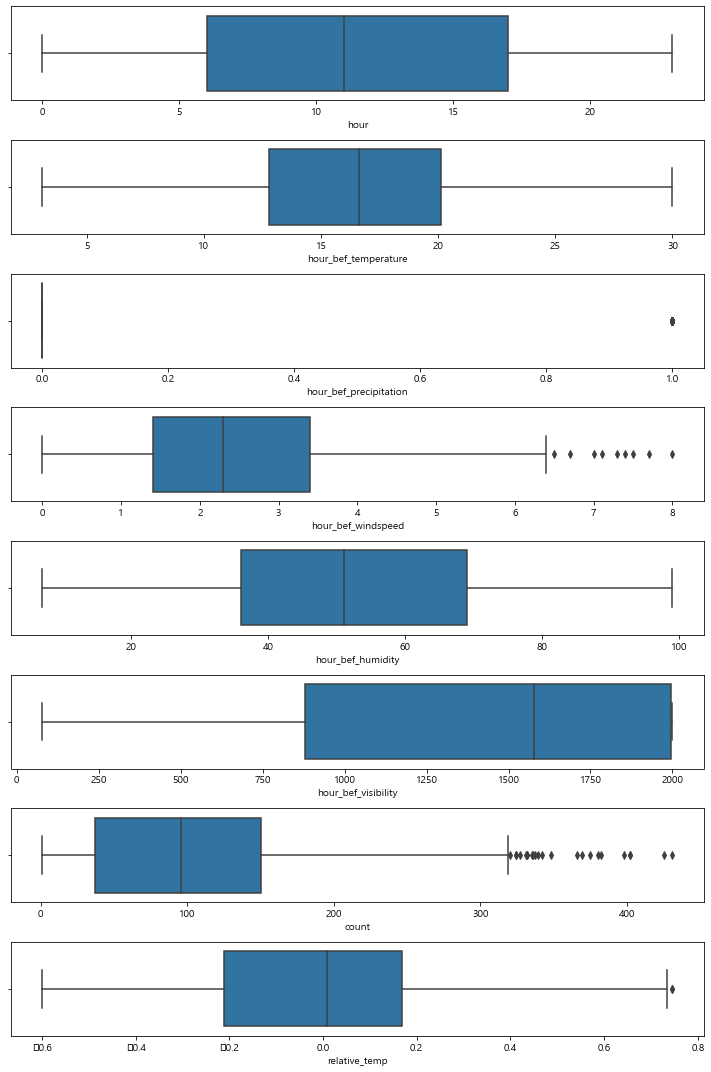

In [ ]:
# boxplot으로 이상치 다시 확인
cl2=train2.columns
fig, axes = plt.subplots(len(cl2)-1,1, figsize = (10, 15))
row=0
for i in cl2[1:]:
    sns.boxplot(data = train2, x = i, ax = axes[row])
    row+=1
plt.tight_layout()
plt.show()

In [ ]:
# IQR 기준 이상치 행 확인
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers

In [ ]:
cl3=['hour', 'hour_bef_temperature', 'hour_bef_windspeed', 
       'hour_bef_humidity', 'hour_bef_visibility', 'count', 'relative_temp']
Outliers_to_drop = detect_outliers(train2, 0, cl3)
len(Outliers_to_drop)

34

In [ ]:
train3 = train2.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
train3.shape

(1423, 9)

### 왜도 첨도 확인 및 로그 정규화 여부 판단

왜도: 개별 feature, 또는 target의 분포도가 skew가 심하면 log 변환 (-2 ~ +2는 치우침이 없다고 판단)

0.7184336945592285


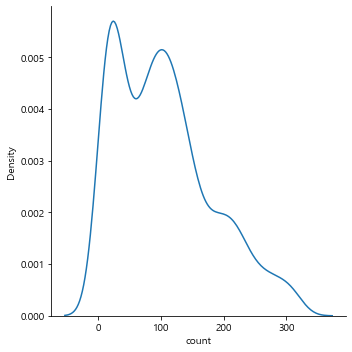

In [ ]:
print(train3['count'].skew())
sns.displot(data=train3, x='count', kind="kde")

첨도: 한쪽 꼬리 부분의 극값과 다른쪽 꼬리의 극 값 간의 차이를 보여준다. 아웃라이어 찾을 때 사용 \
┏첨도가 높으면(Kurtosis > 3) 아웃 라이어가 많음 \
┗첨도가 낮으면(Kurtosis < 3) 극값이 정규분포의 값보다 작기 때문에 결과에 대한 확인이 필요 \
┏첨도가 0보다 크면 정규분포보다 긴 꼬리를 갖고, 분포가 보다 중앙부분에 덜 집중되어 뾰족한 모양을 가지게 된다. \
┗첨도가 0보다 작으면 정규분포보다 짧은 꼬리를 갖고 분포가 중앙부분에 더 집중되어 중앙부분이 보다 완만한 모양을 가지게 된다.

In [ ]:
train['count'].kurt()

0.4593176616576917

## 모델링

In [ ]:
data = train3.drop('id', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423 entries, 0 to 1422
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hour                    1423 non-null   int64  
 1   hour_bef_temperature    1423 non-null   float64
 2   hour_bef_precipitation  1423 non-null   float64
 3   hour_bef_windspeed      1423 non-null   float64
 4   hour_bef_humidity       1423 non-null   float64
 5   hour_bef_visibility     1423 non-null   float64
 6   count                   1423 non-null   float64
 7   relative_temp           1423 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 89.1 KB


In [ ]:
Y = data.pop('count')
X = data

In [ ]:
from sklearn.model_selection import train_test_split
data, eval_data, target, eval_target = train_test_split(X,Y,test_size=.20)

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

estimators=[
    ('linear',LinearRegression()),
    ('elasticnet',SGDRegressor(penalty='elasticnet')),
    ('gb',GradientBoostingRegressor(n_estimators=200, learning_rate=0.05,
                                   max_depth=7, min_samples_leaf=15, min_samples_split=10)),
    ('random_forest',RandomForestRegressor()),
    ('xgb',XGBRegressor(n_estimators=100, learning_rate=0.05, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)),
    ('svc',SVR(C=10, epsilon=0.2, kernel='linear')),
    ('deep_nn',MLPRegressor(hidden_layer_sizes=[512, 4], alpha=0.005, random_state=42)),
    ('knn',KNeighborsRegressor(n_neighbors=5,weights='distance',algorithm='auto'))
]

pipes={}
for model in estimators:
    pipe=Pipeline(steps=[('scaler',StandardScaler()), model])
    pipe.fit(data,target)
    pipes[pipe.steps[1][0]]=pipe

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Initial Model Scoring

In [ ]:
from sklearn.model_selection import KFold,cross_validate
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score

_metrics={'mse':make_scorer(mean_squared_error),'mae':make_scorer(mean_absolute_error),'r2':make_scorer(r2_score)} # 'msle':make_scorer(mean_squared_log_error),

estimator_names=[model[0] for model in estimators]

def plot_estimators(estimators=estimator_names,n_splits=5,metrics=['mse','mae','r2']):
    metrics={key : _metrics[key] for key in metrics}
    scorers=[]
    labels=[]
    for pipe_name in pipes.keys():
        if pipe_name in estimators:
            pipe=pipes[pipe_name]
            labels.append(pipe_name)
            kf=KFold(n_splits)
            model_score=cross_validate(pipe,data,target,scoring=metrics,cv=kf)
            scorers.append(model_score)
    
    score_lists={}
    for metric in metrics:
        score_lists[metric]=[score['test_'+metric] for score in scorers]
    
    for  i,(title, _list) in enumerate(score_lists.items()):
        plt.figure(i)
        plot=sns.boxplot(data=_list).set_xticklabels(labels, rotation=45)
        plt.title(title)

In [ ]:
metrics={'mse':make_scorer(mean_squared_error),'mae':make_scorer(mean_absolute_error),'r2':make_scorer(r2_score)}

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

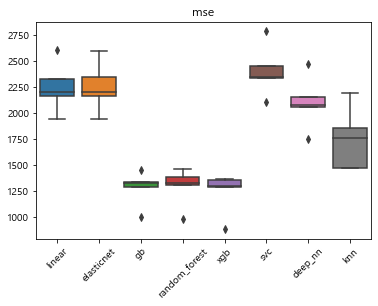

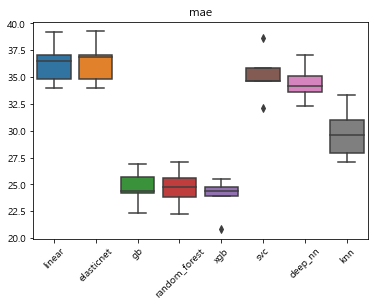

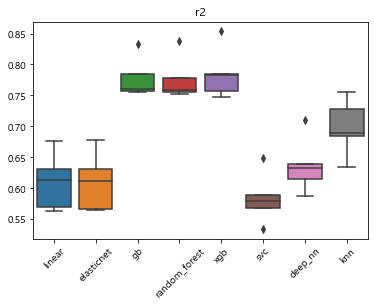

In [ ]:
plot_estimators()

## Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_param(model,param_grid,refit='score',chart=None,data=data,target=target,cv=5):
    
    param_grid={model+'__'+key : param_grid[key] for key in param_grid.keys()}

    xgbcv=GridSearchCV(pipes[model],param_grid, scoring='neg_mean_absolute_error',refit=refit,cv=cv, return_train_score=True)
    xgbcv.fit(data,target)

    print('best score: '+str(xgbcv.best_score_))
    print('best params: '+str(xgbcv.best_params_))
    results=pd.DataFrame(xgbcv.cv_results_)
    print(results.columns)
    
    if 'line' in chart:
        for i,param in enumerate(param_grid.keys()):
            graph_data=results[['param_'+param,'mean_test_'+refit,'mean_train_'+refit]]
            graph_data=graph_data.rename(columns={'mean_test_'+refit:'test','mean_train_'+refit:'train'})
            graph_data=graph_data.melt('param_'+param, var_name='type',value_name=refit)
            plt.figure(i)
            plot=sns.lineplot(x='param_'+param,y=refit,hue='type',data=graph_data)
            
    if 'heatmap' in chart:
        assert len(param_grid) == 2,  'heatmap only works with 2 params, {} passed'.format(str(len(param_grid)))
        
        param1=list(param_grid.keys())[0]
        param2=list(param_grid.keys())[1]

        graph_data=results[['param_'+param1,'param_'+param2,'mean_test_'+refit]]
        graph_data=graph_data.pivot(index='param_'+param1,columns='param_'+param2,values='mean_test_'+refit)
        sns.heatmap(graph_data,annot=True,xticklabels=True,yticklabels=True).set(xlabel=param2,ylabel=param1)

### Parameter Tuning: XGB

In [ ]:
#pipes['xgb'].named_steps['xgb'].get_params()

best score: -95.31661798359531
best params: {'xgb__n_estimators': 900}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_xgb__n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


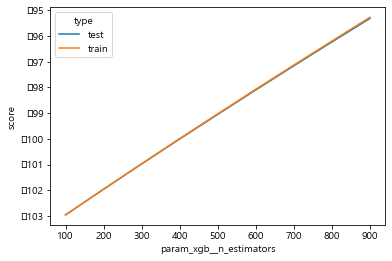

In [ ]:
param_grid={'n_estimators': [100,200,300,400,500,600,700,800,900]} 
tune_param('xgb',param_grid,chart='line')

best score: -27.88048415315447
best params: {'xgb__learning_rate': 0.01}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_xgb__learning_rate', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


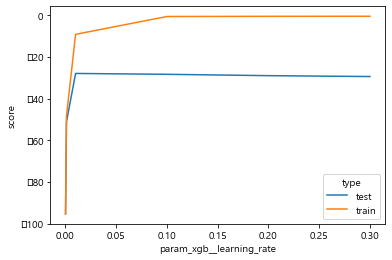

In [ ]:
param_grid={'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}
tune_param('xgb',param_grid,chart='line')

best score: -95.31661798359531
best params: {'xgb__subsample': 1}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_xgb__subsample', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


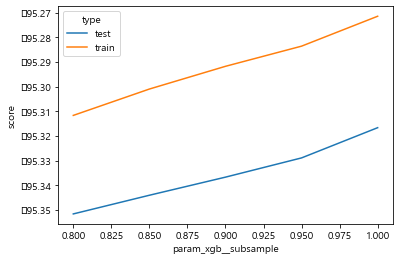

In [ ]:
param_grid={'subsample':[0.8,0.85,0.9,0.95,1]}
tune_param('xgb',param_grid,chart='line')

best score: -95.31661798359531
best params: {'xgb__colsample_bytree': 0.3}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_xgb__colsample_bytree', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


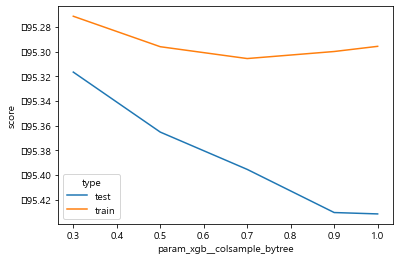

In [ ]:
param_grid={'colsample_bytree':[0.3,0.5,0.7,0.9,1]}
tune_param('xgb',param_grid,chart='line')

best score: -95.31644717424368
best params: {'xgb__gamma': 5}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_xgb__gamma', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


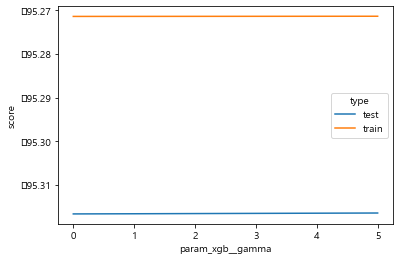

In [ ]:
param_grid={'gamma':[0,1,5]}
tune_param('xgb',param_grid,chart='line')

In [ ]:
pipes['xgb'].set_params(**{'xgb__n_estimators': 900})
pipes['xgb'].set_params(**{'xgb__learning_rate': 0.01})
pipes['xgb'].set_params(**{'xgb__subsample': 1})
pipes['xgb'].set_params(**{'xgb__colsample_bytree': 0.3})
pipes['xgb'].set_params(**{'xgb__gamma': 5})

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.3, enable_categorical=False,
                              gamma=5, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.01,
                              max_delta_step=0, max_depth=7, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=900, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

### Parameter Tuning: Randomforest

In [ ]:
#pipes['random_forest'].named_steps['random_forest'].get_params()


best score: -24.452812330442434
best params: {'random_forest__max_depth': 18}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_random_forest__max_depth', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


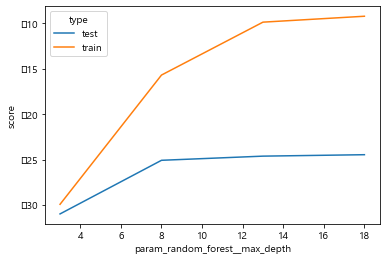

In [ ]:
param_grid={'max_depth':[3,8,13,18]}
tune_param('random_forest',param_grid,chart='line')

best score: -26.955866705373136
best params: {'random_forest__max_leaf_nodes': 25}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_random_forest__max_leaf_nodes', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


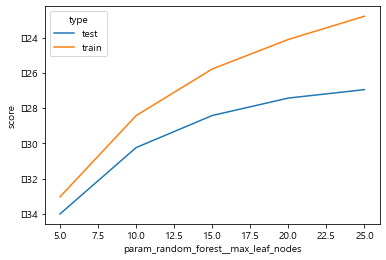

In [ ]:
param_grid={'max_leaf_nodes':[5,10,15,20,25]}
tune_param('random_forest',param_grid,chart='line')

best score: -24.455880361697194
best params: {'random_forest__n_estimators': 500}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_random_forest__n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


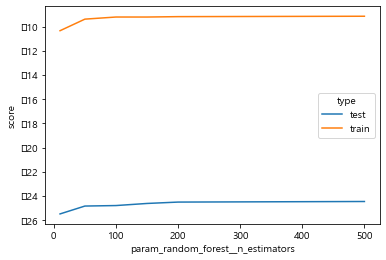

In [ ]:
param_grid={'n_estimators':[10,50,100,150,200,500]}
tune_param('random_forest',param_grid,chart='line')

In [ ]:
pipes['random_forest'].set_params(**{'random_forest__max_depth': 18})
pipes['random_forest'].set_params(**{'random_forest__max_leaf_nodes': 25})
pipes['random_forest'].set_params(**{'random_forest__n_estimators': 500})

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestRegressor(max_depth=18, max_leaf_nodes=25,
                                       n_estimators=500))])

### Parameter Tuning: SVM

best score: -35.155869881047856
best params: {'svc__C': 10}
Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'mean_train_score',
       'std_train_score'],
      dtype='object')


c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


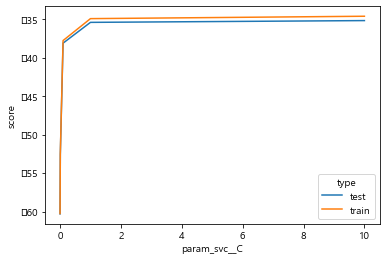

In [ ]:
param_grid={'C': [0.001, 0.01, 0.1, 1, 10]}
tune_param('svc',param_grid,chart='linear')

In [ ]:
pipes['svc'].set_params(**{'svc__C': 10})

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVR(C=10, epsilon=0.2, kernel='linear'))])

c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Opti

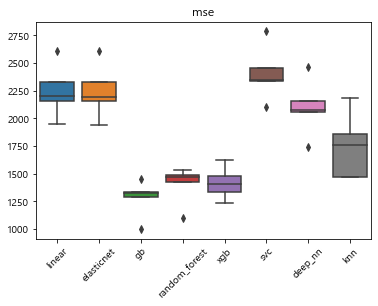

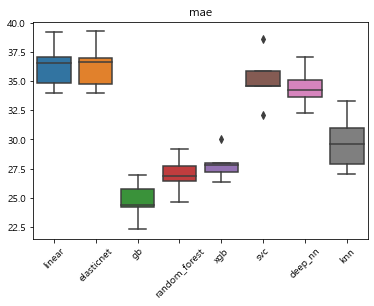

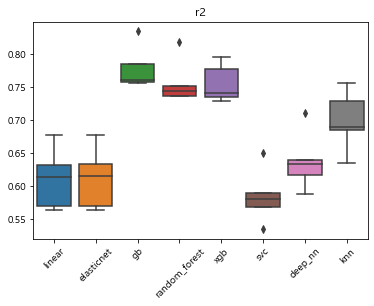

In [ ]:
# Post-Tuning Scores
plot_estimators()

## Ensemble

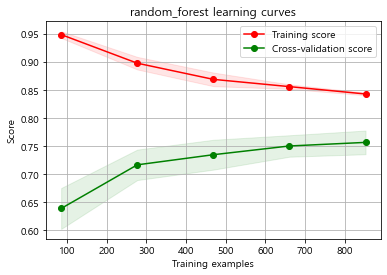

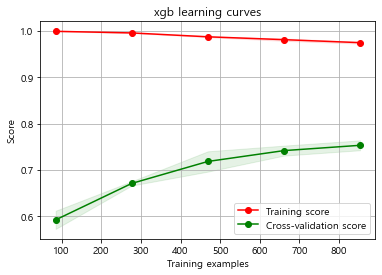

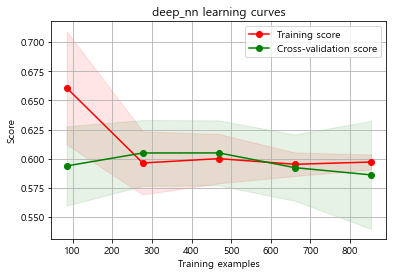

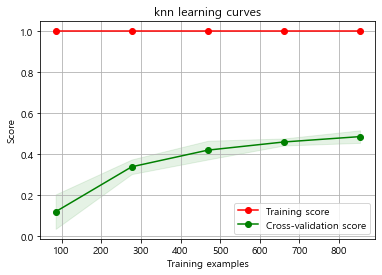

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

#t=transformer
#t.fit(data)
#t=t.transform(data)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

to_plot=['xgb','random_forest','deep_nn','knn']
for name in pipes.keys():
    if name in to_plot:
        g=plot_learning_curve(pipes[name].named_steps[name],name+' learning curves',data,target,cv=KFold(4),n_jobs=4)

### Tree-Based Feature Importance

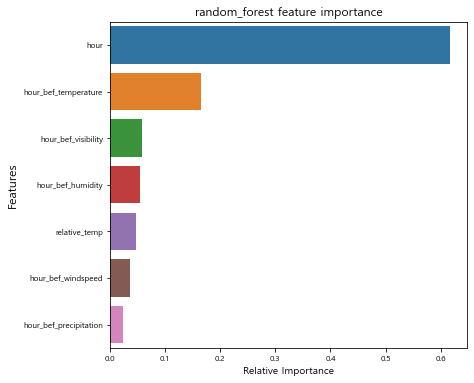

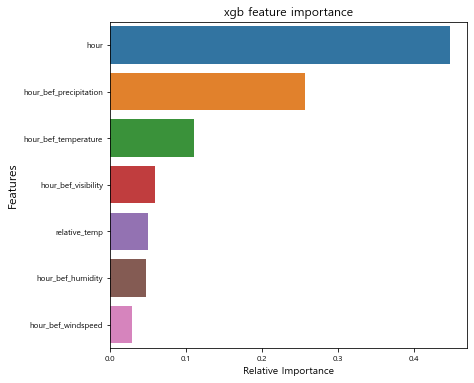

In [ ]:
tree_based=['random_forest','xgb']
for name in pipes.keys(): 
    if name in tree_based:
        feat_impt=pipes[name].named_steps[name].feature_importances_
        graph_data=pd.DataFrame()

        graph_data['feature']=data.columns.values
        graph_data['importance']=feat_impt
        graph_data_top=graph_data.nlargest(30,'importance')

        plt.figure(figsize=(6.4,6))
        g=sns.barplot(y='feature',x='importance',data=graph_data_top,orient='h')
        g.set_ylabel('Features',fontsize=12)
        g.set_xlabel('Relative Importance')
        g.set_title(name + " feature importance")
        g.tick_params(labelsize=8)

### Estimator Prediction Correlation: 모델 결과 간의 상관성 체크

<AxesSubplot:>

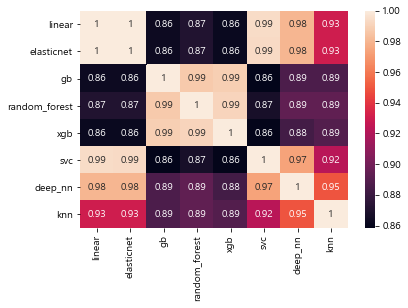

In [ ]:
ensemble_results=pd.DataFrame()
for name,pipe in pipes.items():
    ensemble_results[name]=pipe.predict(eval_data)
sns.heatmap(ensemble_results.corr(),annot=True)

In [ ]:
del pipes['linear'],pipes['elasticnet'],pipes['svc'] 

In [ ]:
def print_predictions(target,predictions):
    print('mean_absolute_error: '+str(mean_absolute_error(target,predictions)))
    print('mean_squared_error: '+str(mean_squared_error(target,predictions)))
    print('r2_score: '+str(r2_score(target,predictions)))

In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.base import clone

estimators=[(pipe.steps[1][0],clone(pipe.steps[1][1])) for pipe in pipes.values()] 
vote=Pipeline(steps=[('voter',VotingRegressor(estimators))])
vote.fit(data,target)
predictions=vote.predict(eval_data)

print_predictions(eval_target,predictions)

c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mean_absolute_error: 32.519076928261526
mean_squared_error: 2075.837663233333
r2_score: 0.6659235278690605


In [ ]:
for name in pipes.keys():
    print(name)
    predictions=pipes[name].predict(eval_data)
    print_predictions(eval_target,predictions)
    print()

gb
mean_absolute_error: 28.53493119699878
mean_squared_error: 1846.7134480655448
r2_score: 0.7027978031742874

random_forest
mean_absolute_error: 28.734912280701757
mean_squared_error: 1848.4630389473682
r2_score: 0.7025162314696092

xgb
mean_absolute_error: 27.981592062899942
mean_squared_error: 1908.7177737133952
r2_score: 0.6928190910928103

deep_nn
mean_absolute_error: 37.85160402960865
mean_squared_error: 2693.4496660831023
r2_score: 0.5665276826581229

knn
mean_absolute_error: 34.60238165658697
mean_squared_error: 2396.715744009483
r2_score: 0.6142827762300951



In [ ]:
from itertools import combinations

final_estimators=pipes.keys()

combos=[]
for L in range(2, len(final_estimators)+1):
    for subset in combinations(final_estimators, L):
        combos.append(list(subset))


combo_names=[]
mae=[]
mse=[]
r2=[]

for combo in combos:
    estimators=[(name,clone(pipes[name].named_steps[name])) for name in combo] 
    vote=Pipeline(steps=[('voter',VotingRegressor(estimators))])
    vote.fit(data,target)
    predictions=vote.predict(eval_data)

    mae.append(mean_absolute_error(eval_target,predictions))
    mse.append(mean_squared_error(eval_target,predictions))
    r2.append(r2_score(eval_target,predictions))
    combo_names.append(str(list(combo)))
    
score=pd.DataFrame()
score['combo']=combo_names
score['mae']=mae
score['mse']=mse
score['r2']=r2

score

c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate 

,combo,mae,mse,r2
0,"['gb', 'random_forest']",29.250068,1862.232608,0.700300
1,"['gb', 'xgb']",28.597104,1828.853246,0.705672
2,"['gb', 'deep_nn']",32.759757,2120.754060,0.658695
3,"['gb', 'knn']",34.225660,2287.034034,0.631934
4,"['random_forest', 'xgb']",29.673675,1869.350225,0.699155
5,"['random_forest', 'deep_nn']",34.907417,2290.974779,0.631300
6,"['random_forest', 'knn']",35.703759,2396.255485,0.614357
7,"['xgb', 'deep_nn']",34.202292,2256.466167,0.636854
8,"['xgb', 'knn']",35.527801,2424.828502,0.609758
9,"['deep_nn', 'knn']",40.829396,3106.373803,0.500073


## 결과

### test data

In [ ]:
test.isna().sum()

id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

In [ ]:
test1=test.drop(['hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'], axis=1)
test1[test1.isna().any(axis=1)] #hour 하나 가지고 어떻게 하라고

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility
653,1943,19,NaN,NaN,NaN,NaN,NaN


In [ ]:
test1.fillna(0,inplace = True)

In [ ]:
del pipes['deep_nn'],pipes['knn']

In [469]:
final_estimators=[(pipe.steps[1][0],clone(pipe.steps[1][1])) for pipe in pipes.values()] 
final_vote=Pipeline(steps=[('voter',VotingRegressor(final_estimators))])
final_vote.named_steps

c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


mean_absolute_error: 28.781184813588858
mean_squared_error: 1822.6665424773269
r2_score: 0.7066678097392829


In [11]:
final_vote.fit(data,target)
predictions=final_vote.predict(eval_data)

print_predictions(eval_target,predictions)

NameError: name 'final_vote' is not defined

In [473]:
full_data = train3.drop('id', axis = 1)
full_Y = full_data.pop('count')
full_X = full_data

final_vote.fit(full_X,full_Y)

c:\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Pipeline(steps=[('voter',
                 VotingRegressor(estimators=[('gb',
                                              GradientBoostingRegressor(learning_rate=0.05,
                                                                        max_depth=7,
                                                                        min_samples_leaf=15,
                                                                        min_samples_split=10,
                                                                        n_estimators=200)),
                                             ('random_forest',
                                              RandomForestRegressor(max_depth=18,
                                                                    max_leaf_nodes=25,
                                                                    n_estimators=500)),
                                             ('xgb',
                                              XGBRegressor(base_score=0.5,
                  

In [474]:
pred = final_vote.predict(test1)
submission = pd.read_csv('./submission.csv')
submission['count'] = pred
submission

,id,count
0,0,47.683052
1,1,50.922747
2,2,15.786296
3,4,14.975659
4,5,18.614409
...,...,...
710,2148,30.484342
711,2149,30.484342
712,2165,31.273804
713,2166,50.977236


In [475]:
submission.to_csv('./submission0119.csv', index=False)

# trash

### 결측치 처리 - 변수별로 확인 후 처리한 train2

In [ ]:
train[train['hour_bef_temperature'].isnull()] #hour, count 제외하고 전부 NaN -> 제거

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,relative_temp
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
train = train.drop(index=[934,1035], axis=0)
train.isnull().sum()

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          7
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             74
hour_bef_pm10              88
hour_bef_pm2.5            115
count                       0
relative_temp               0
dtype: int64

In [ ]:
train[train['hour_bef_pm2.5'].isnull() != train['hour_bef_pm10'].isnull()] #서로의 값에 따른 평균값으로 대체

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count,relative_temp
33,56,21,10.2,0.0,0.5,84.0,1668.0,0.021,24.0,NaN,127.0,6.778333
192,295,8,9.2,0.0,0.8,90.0,347.0,0.022,39.0,NaN,160.0,3.400000
234,366,17,22.3,0.0,2.7,42.0,819.0,0.073,200.0,NaN,151.0,-0.696667
273,426,10,7.7,0.0,0.5,65.0,990.0,0.011,35.0,NaN,55.0,8.542623
607,931,20,20.6,0.0,2.6,60.0,830.0,0.070,NaN,51.0,190.0,-2.408197
633,970,14,12.9,0.0,2.8,39.0,2000.0,0.046,19.0,NaN,164.0,8.334426
672,1025,5,5.5,0.0,0.5,78.0,2000.0,0.022,18.0,NaN,7.0,7.173770
680,1038,16,22.8,0.0,4.3,40.0,716.0,0.075,212.0,NaN,135.0,-0.785000
784,1200,8,3.2,0.0,0.4,83.0,728.0,0.004,30.0,NaN,21.0,9.400000
791,1208,14,19.1,0.0,1.7,44.0,1155.0,0.036,34.0,NaN,112.0,2.134426


In [ ]:
pm10bypm25=train.groupby(['hour_bef_pm2.5'])['hour_bef_temperature'].mean()
aa=train.apply(lambda x : x['hour_bef_ozone'] if np.isnan(x['hour_bef_temperature']) else x['hour_bef_temperature'], axis=1)
aa.isna().sum()

In [ ]:
corr_result = train.corr()

In [ ]:
a_list=corr_result['hour'].sort_values()
a_list.index(max(a_list))

TypeError: 'Index' object is not callable

In [ ]:
ozontemp=train.groupby(['hour_bef_ozone'])['hour_bef_temperature'].mean()
aa=train.apply(lambda x : x['hour_bef_ozone'] if np.isnan(x['hour_bef_temperature']) else x['hour_bef_temperature'], axis=1)
aa.isna().sum()

In [ ]:
 #temp->ozon, pre->humidity, hum->vis, vis->2.5, ozon->temp, pm10->2.5, pm2.5->vis
def replace_by_corr(x, va):
    while np.isnan(x[va])==True: #va값이 nan일때,
        by_corr = corr_result.sort
        replacement = 

    return replacement

### 결측치 처리 - 상관관계에 따라 처리한 train3

In [ ]:
hour_bef_precipitation

In [ ]:
train[['hour','count']].groupby('hour').mean()

,count
hour,
0,71.766667
1,47.606557
2,31.409836
3,21.377049
4,13.524590
5,13.114754
6,24.557377
7,62.360656
8,136.688525


In [ ]:
import matplotlib.pyplot as plt

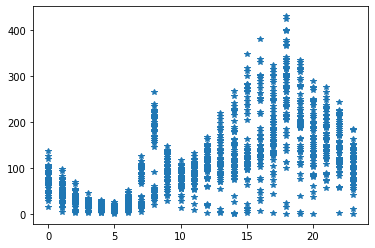

In [ ]:
plt.plot('hour', 'count', '*', data = train)